In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm

df = pd.read_csv('assessment_da25.csv')

In [2]:
df

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.00,0,2,74,0
1,A,4,0.00,4,1,21,1
2,A,4,0.00,2,0,1,2
3,A,5,0.00,0,1,26,3
4,A,5,0.00,3,3,46,4
...,...,...,...,...,...,...,...
1995,B,3,0.00,1,0,1,1995
1996,B,3,0.00,1,2,31,1996
1997,B,3,0.00,2,0,3,1997
1998,B,4,87.08,2,1,11,1998


In [15]:
# Group data by Variant and compute the total count of variables
grouped_data = df.groupby('Variant').agg({'Number of page views': 'sum', 
                                           'GMV (in $)': 'sum', 
                                           'Number of add to cart': 'sum', 
                                           'Clicks on media': 'sum', 
                                           'Time on Page (sec)': 'sum'})

print(grouped_data)

         Number of page views  GMV (in $)  Number of add to cart  \
Variant                                                            
A                        4985     7689.99                   1884   
B                        5317     9289.53                   2469   

         Clicks on media  Time on Page (sec)  
Variant                                       
A                   1495               20543  
B                   1324               20047  


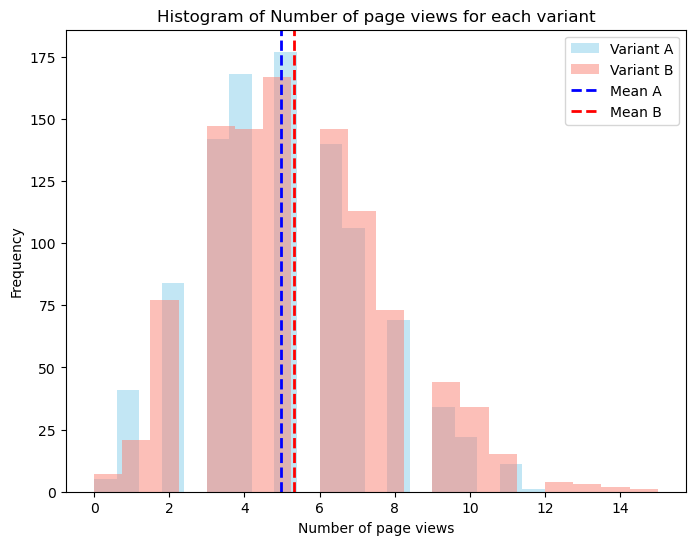

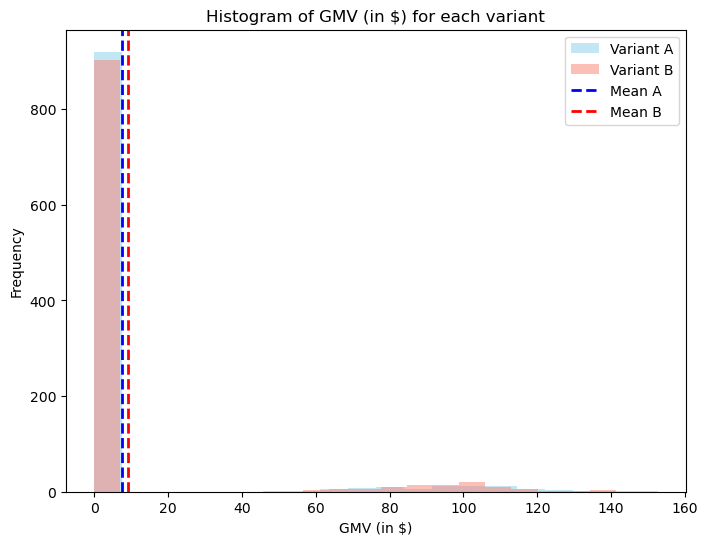

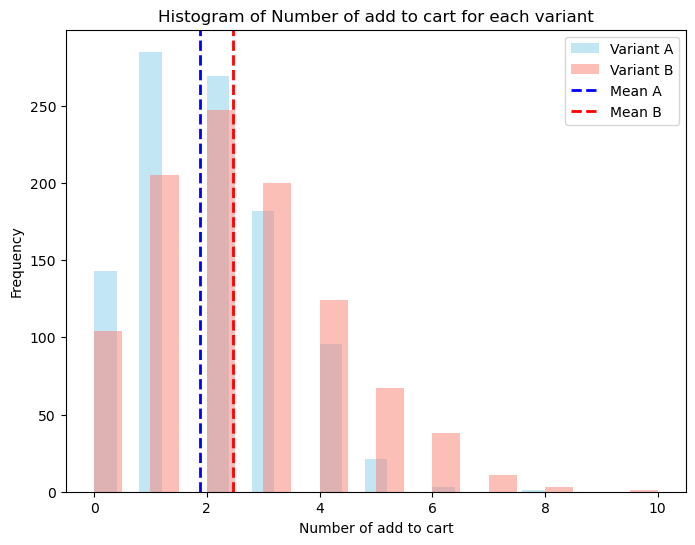

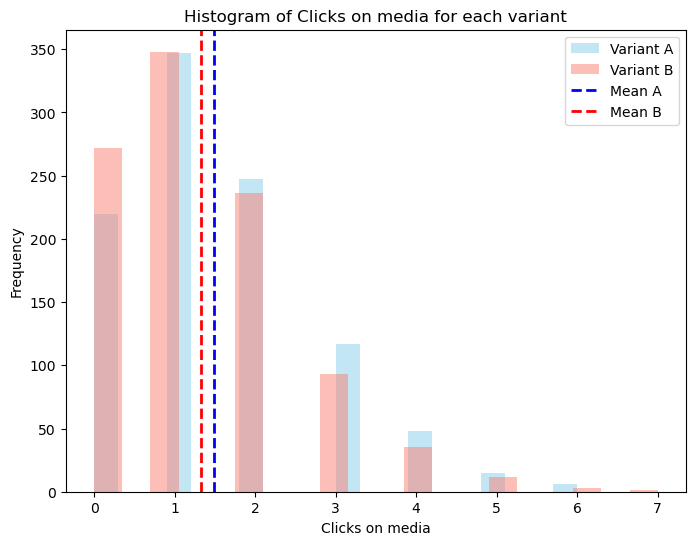

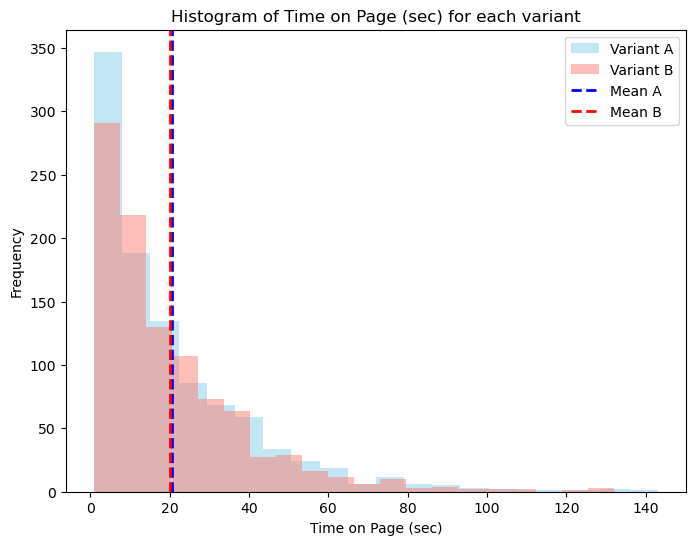

In [6]:
# How do the distributions of your metrics compare between the two variants? Show me plots comparing the distributions

# Loop over each variable
for variable in ['Number of page views', 'GMV (in $)', 'Number of add to cart', 'Clicks on media', 'Time on Page (sec)']:
    # Retrieve data for each variant and variable
    data_variant_A = df[df['Variant'] == 'A'][variable]
    data_variant_B = df[df['Variant'] == 'B'][variable]

    # Create subplots
    plt.figure(figsize=(8, 6))
    
    # Histogram for variant A
    plt.hist(data_variant_A, bins=20, alpha=0.5, color='skyblue', label='Variant A')
    
    # Histogram for variant B
    plt.hist(data_variant_B, bins=20, alpha=0.5, color='salmon', label='Variant B')
    
    # Add a line for the mean of variant A
    plt.axvline(x=data_variant_A.mean(), color='blue', linestyle='--', linewidth=2, label='Mean A')
    
    # Add a line for the mean of variant B
    plt.axvline(x=data_variant_B.mean(), color='red', linestyle='--', linewidth=2, label='Mean B')
    
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {variable} for each variant')
    plt.legend()
    plt.show()

In [4]:
# What test did you apply? T-test

# Extract data for each variable for each variant
data_variant_A = df[df['Variant'] == 'A']
data_variant_B = df[df['Variant'] == 'B']

# List of variables to include in the t-test
variables = ['GMV (in $)', 'Number of page views', 'Number of add to cart', 'Time on Page (sec)', 'Clicks on media']

# Loop over each variable and perform t-test for each
for variable in variables:
    # Perform t-test for the current variable
    t_statistic, p_value = stats.ttest_ind(data_variant_A[variable], data_variant_B[variable], equal_var=False)
    
    # Print the results for the current variable
    print(f"T-test result for {variable}:")
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)
    print()  # Blank line to separate results for different variables

T-test result for GMV (in $):
T-statistic: -1.2839539769831623
P-value: 0.19930776178517312

T-test result for Number of page views:
T-statistic: -3.1881645133877003
P-value: 0.001454076157215842

T-test result for Number of add to cart:
T-statistic: -8.777389396187948
P-value: 3.668898697938531e-18

T-test result for Time on Page (sec):
T-statistic: 0.5554299489081426
P-value: 0.5786630478332149

T-test result for Clicks on media:
T-statistic: 3.1710702328903153
P-value: 0.001541857715988478



In [8]:
# Define data_variant_A and data_variant_B by filtering data based on the variant
variant_A = df[df['Variant'] == 'A']
variant_B = df[df['Variant'] == 'B']

# List of variables to process
variables = ['Number of page views', 'GMV (in $)', 'Number of add to cart', 'Clicks on media', 'Time on Page (sec)']

# Create an empty list to store the results
results = []

# Loop over each variable
for variable in variables:
    # Filter rows where the variable is greater than 0 for each variant
    filtered_data_A = variant_A[variant_A[variable] > 0]
    filtered_data_B = variant_B[variant_B[variable] > 0]
    
    # Count the number of rows where the variable is greater than 0 for each variant
    count_variant_A = filtered_data_A.shape[0]
    count_variant_B = filtered_data_B.shape[0]

    # Add the result to the list
    results.append({'Variable': variable, 'Variant A': count_variant_A, 'Variant B': count_variant_B})

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results)

# Apply style to the table
styled_table = results_df.style.format("{:.0f}", subset=['Variant A', 'Variant B'])
styled_table

,Variable,Variant A,Variant B
0,Number of page views,995,993
1,GMV (in $),80,97
2,Number of add to cart,857,896
3,Clicks on media,780,728
4,Time on Page (sec),1000,1000


In [10]:
# Number of clicks on media for each variant
clicks_on_media_A = 780
clicks_on_media_B = 728

# Number of conversions for each variant 
conversions_A = 80  # Number of conversions for variant A
conversions_B = 97  # Number of conversions for variant B

# Calculate the conversion rate for each variant
conversion_rate_A = (conversions_A / clicks_on_media_A) * 100
conversion_rate_B = (conversions_B / clicks_on_media_B) * 100

# Print the conversion rate for each variant
print("Conversion rate for variant A:", conversion_rate_A)
print("Conversion rate for variant B:", conversion_rate_B)

Conversion rate for variant A: 10.256410256410255
Conversion rate for variant B: 13.324175824175825
